In [2]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler, RandomSampler
import torchvision.models as models
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import MultiStepLR
#torch.multiprocessing.set_start_method("spawn")
import densenet 

import numpy as np
import pandas as pd
from utils import progress_bar

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
BASE_dir = 'data/processed/'

train = pd.read_json(BASE_dir + 'train.json')
test = pd.read_json(BASE_dir + 'test.json')

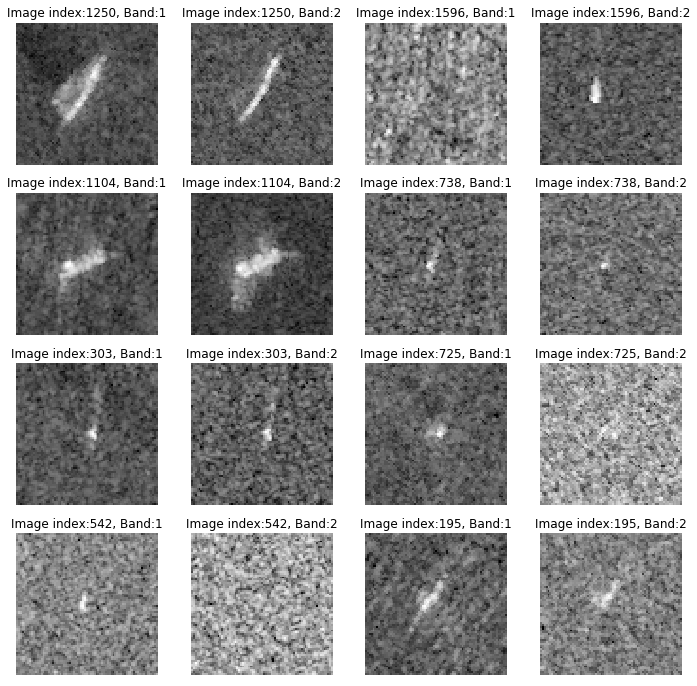

In [5]:
len(train) # 1604 obs
train.head(3)
#randomly draw some of them

fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(4,4)

index = np.random.choice(list(range(len(train))),size=8, replace=False)
for num,i in enumerate(index):
    for j in range(2):
        ax = plt.subplot(gs[num*2+j])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title('Image index:%d, Band:%d' % (i, j%2+1))
        ax.set_aspect('equal')
        plt.imshow(np.array(train.iloc[i,j%2]).reshape(75,75))

[[-30.603315   -30.09381248 -29.64736289 ...,   0.           0.           0.        ]
 [-30.48854694 -30.21305251 -26.34368889 ...,   0.           0.           0.        ]
 [-27.82654315 -25.90108481 -23.88814338 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]


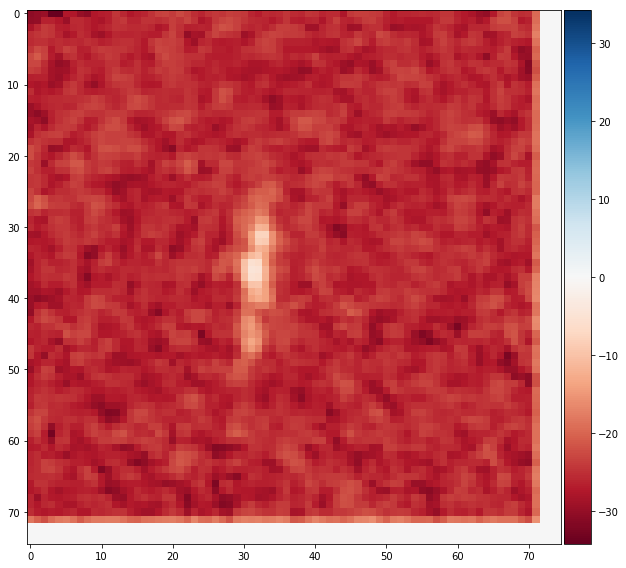

TypeError: 'numpy.float64' object is not iterable

In [12]:
from skimage import io
from skimage import transform as tf
import numpy as np

# Load the image as a matrix

#a = io.imread(np.array(train.iloc[i,j%2]).reshape(75,75))
# Create Afine transform

scale = np.exp(np.random.uniform(np.log(1/1.1), np.log(1.1)))
scaling= tf.AffineTransform(scale=(scale,scale))
af_scale = tf.warp(np.array(train.iloc[i+1,j%2]).reshape(75,75), inverse_map=scaling)
print(af_scale)
io.imshow(af_scale)
io.show()



# shear = np.random.uniform()
# afine_tf = tf.AffineTransform(shear=-np.pi/18)
# modified = tf.warp(np.array(train.iloc[i,j%2]).reshape(75,75), inverse_map=afine_tf)
# print(np.array(train.iloc[i+1,j%2]).reshape(75,75))
# io.imshow(modified)
# io.show()


# io.imshow(np.array(train.iloc[i+1,j%2]).reshape(75,75))
# io.show()
# rot = tf.rotate(np.array(train.iloc[i+1,j%2]).reshape(75,75),angle=90,resize=True)
# print(rot.shape)
# print(rot)
#modified = tf.warp(np.array(train.iloc[i+1,j%2]).reshape(75,75), inverse_map=afine_tf)

#translation
# translation = tf.AffineTransform(translation=-5)
# tran = tf.warp(np.array(train.iloc[i+1,j%2]).reshape(75,75), inverse_map=translation)
# # print(rot)
# io.imshow(tran)
# io.show()


# rotate1 = tf.EuclideanTransform(rotation=np.pi/18)
# rot1 = tf.warp(np.array(train.iloc[i+1,j%2]).reshape(75,75), inverse_map=rotate1)
# #modified
# Display the result
# io.imshow(rot)
# io.show()


##################
angle = np.random.uniform(0,360)
tf.rotate(np.array(train.iloc[i+1,j%2]).reshape(75,75),angle=90,resize=True)
scale = np.exp(np.random.uniform(np.log(1/1.3), np.log(1.3)))
shear = np.random.uniform(-np.pi/18, np.pi/18)
tran = np.random.uniform(-5, 5)
aug = tf.AffineTransform(shear = shear, translation=tran, scale= scale)
tran = tf.warp(np.array(train.iloc[i+1,j%2]).reshape(75,75), inverse_map=aug)

In [8]:
!sudo pip3 install scikit-image
np.array(train.iloc[i,j%2]).reshape(75,75)

The directory '/home/FDSM_lhn/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/FDSM_lhn/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 35.5MB 43kB/s  eta 0:00:01
    100% |████████████████████████████████| 5.7MB 259kB/s eta 0:00:01
    100% |████████████████████████████████| 1.6MB 1.0MB/s eta 0:00:01
  Running setup.py install for networkx ... done


array([[-26.348297, -28.286568, -27.263584, ..., -31.285797, -27.595375,
        -27.267635],
       [-26.947632, -26.947632, -29.042406, ..., -23.639097, -31.285862,
        -27.267635],
       [-26.947632, -30.78541 , -31.808529, ..., -27.595375, -26.352486,
        -26.647018],
       ..., 
       [-22.45158 , -27.266331, -24.298002, ..., -25.527315, -25.527384,
        -25.794733],
       [-24.529572, -24.529572, -25.012314, ..., -25.527384, -25.527384,
        -25.794733],
       [-26.351181, -25.012314, -26.351318, ..., -25.527384, -25.527454,
        -24.533766]])

In [11]:
modified

array([[-26.348297  , -28.286568  , -27.263584  , ..., -31.285797  ,
        -27.595375  , -27.267635  ],
       [-21.58439065, -26.96664571, -28.60312746, ..., -23.77825579,
        -29.73801735, -28.05131855],
       [-18.992126  , -29.16830518, -31.27475197, ..., -26.4526369 ,
        -26.90219419, -26.62304795],
       ..., 
       [  0.        ,   0.        ,   0.        , ..., -25.05385959,
        -23.66859873, -23.26688725],
       [  0.        ,   0.        ,   0.        , ..., -24.52997294,
        -23.54553639, -22.69814902],
       [  0.        ,   0.        ,   0.        , ..., -23.97965997,
        -24.22497892, -24.22149631]])